In [3]:
# ----------------------
# Imports and Setup
# ----------------------

"""
Complete Analysis Script
Runs the full inflation vs returns analysis and generates all outputs.
"""

import pandas as pd
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from src.data_loader import DataLoader
from src.calculations import FinancialCalculator
from src.visualizations import FinancialVisualizer

INFLATION VS MARKET RETURNS ANALYSIS

Step 1: Loading Data...
  ✓ Loaded CPI data: 130 observations
  ✓ Loaded S&P 500 data: 278 monthly observations

Step 2: Calculating Returns...
  ✓ Calculated monthly returns: 277 observations

Step 3: Aligning Data...
  ✓ Aligned dataset: 130 observations
  ✓ Date range: 2012-05-31 00:00:00 to 2023-02-28 00:00:00

Step 4: Calculating Correlations...
  ✓ 5-year rolling correlation: mean=-0.042
  ✓ 3-year rolling correlation: mean=-0.053

Step 5: Analyzing Inflation Regimes...
  ✓ Regime distribution:
    - Moderate (1-3%): 90 months
    - High (>3%): 22 months
    - Low (<1%): 18 months

Step 6: Calculating Performance Metrics...
  ✓ Annualized nominal return: 11.34%
  ✓ Annualized real return: -17.30%
  ✓ Average inflation: 2.47%

Step 7: Saving Processed Data...
  ✓ Saved processed data to C:\Users\rfull\Building Data Together Weeklies\Finance February\Inflation vs Market Returns Analysis\data\processed

Step 8: Generating Visualizations...
  Cre

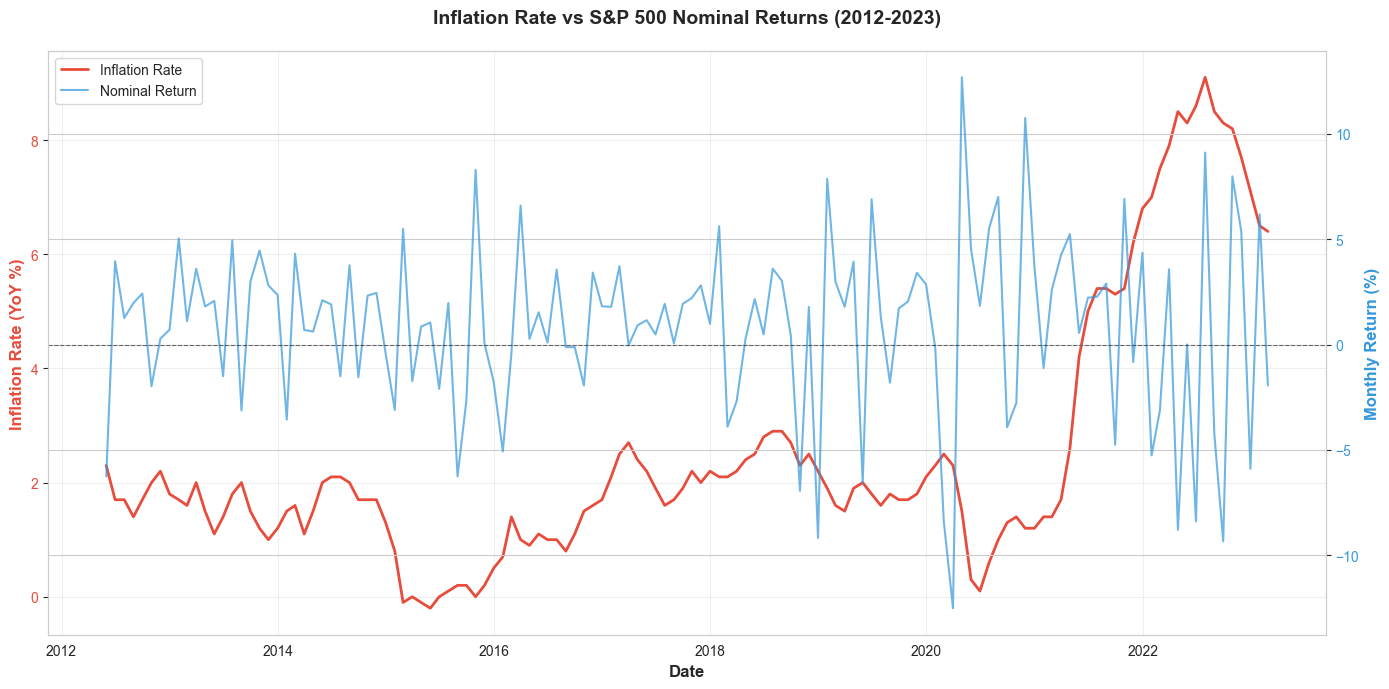

  Creating Figure 2: Real vs Nominal Returns...
Saved: C:\Users\rfull\Building Data Together Weeklies\Finance February\Inflation vs Market Returns Analysis\figures\real_vs_nominal_returns.png


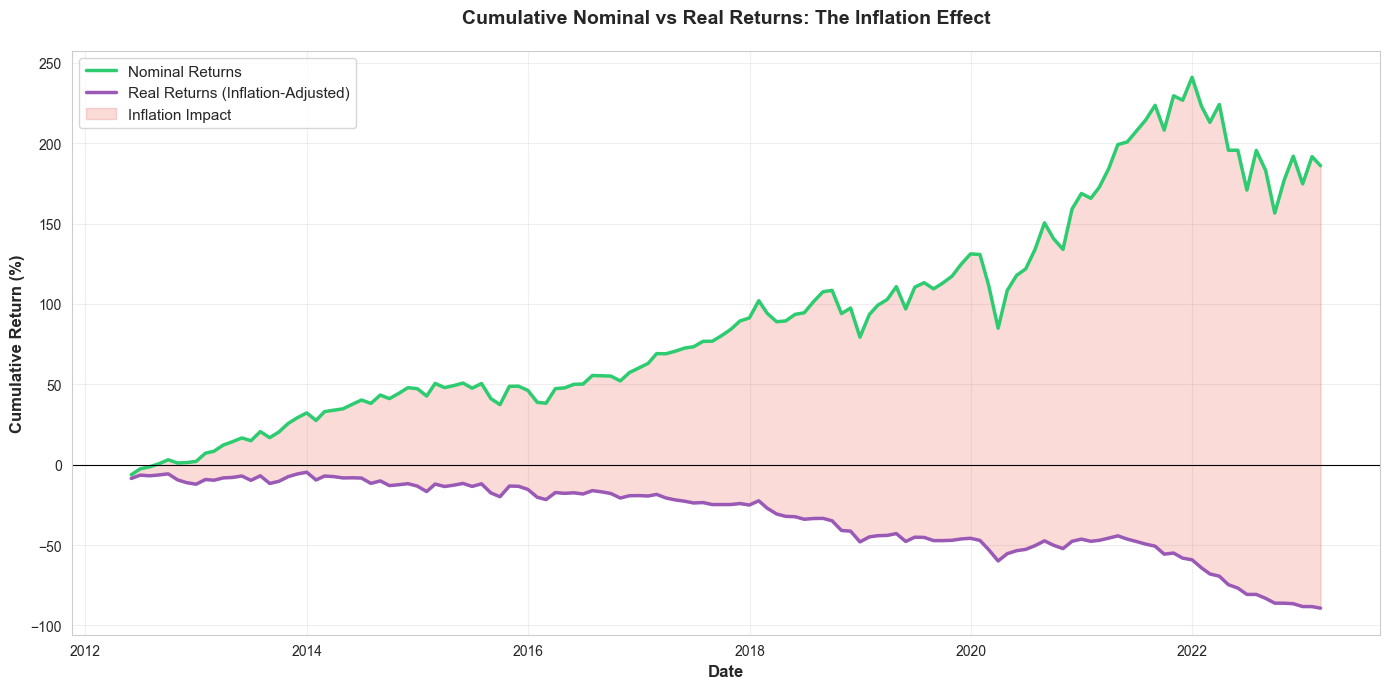

  Creating Figure 3: Rolling Correlation...
Saved: C:\Users\rfull\Building Data Together Weeklies\Finance February\Inflation vs Market Returns Analysis\figures\rolling_correlation.png


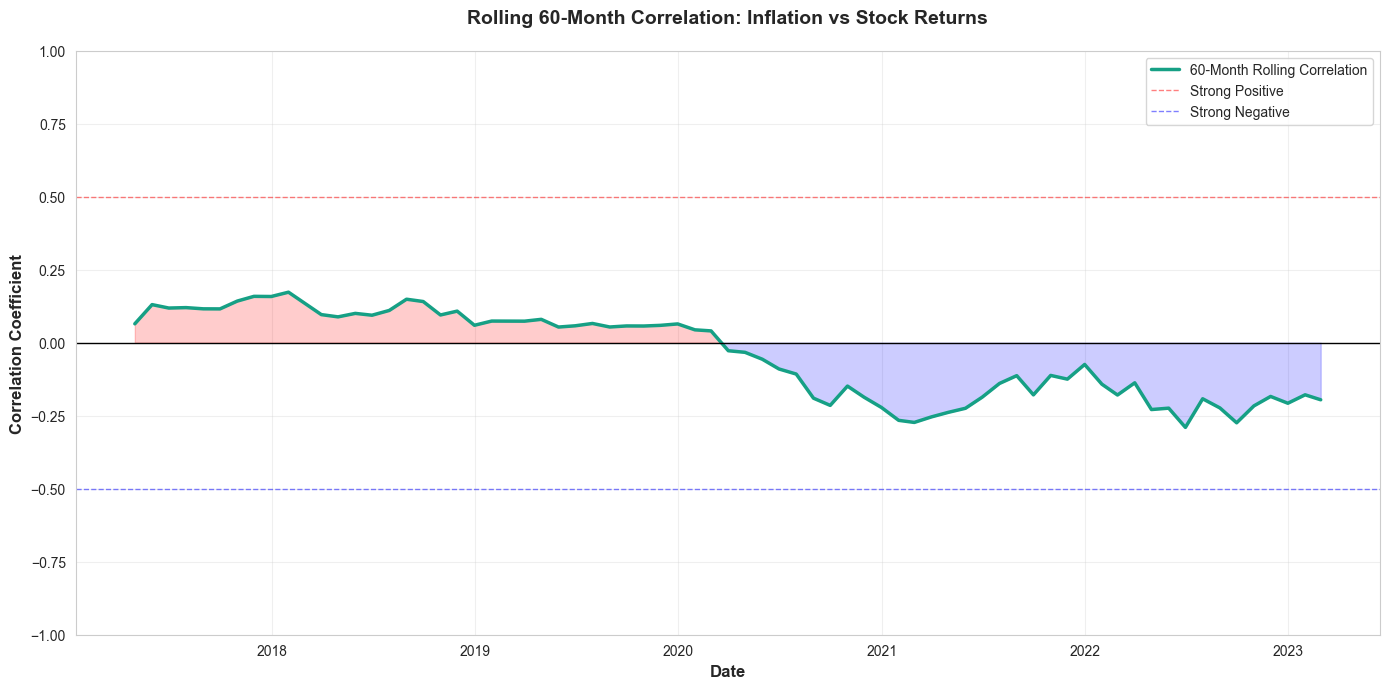

  Creating Figure 4: Inflation Regimes...
Saved: C:\Users\rfull\Building Data Together Weeklies\Finance February\Inflation vs Market Returns Analysis\figures\inflation_regimes.png


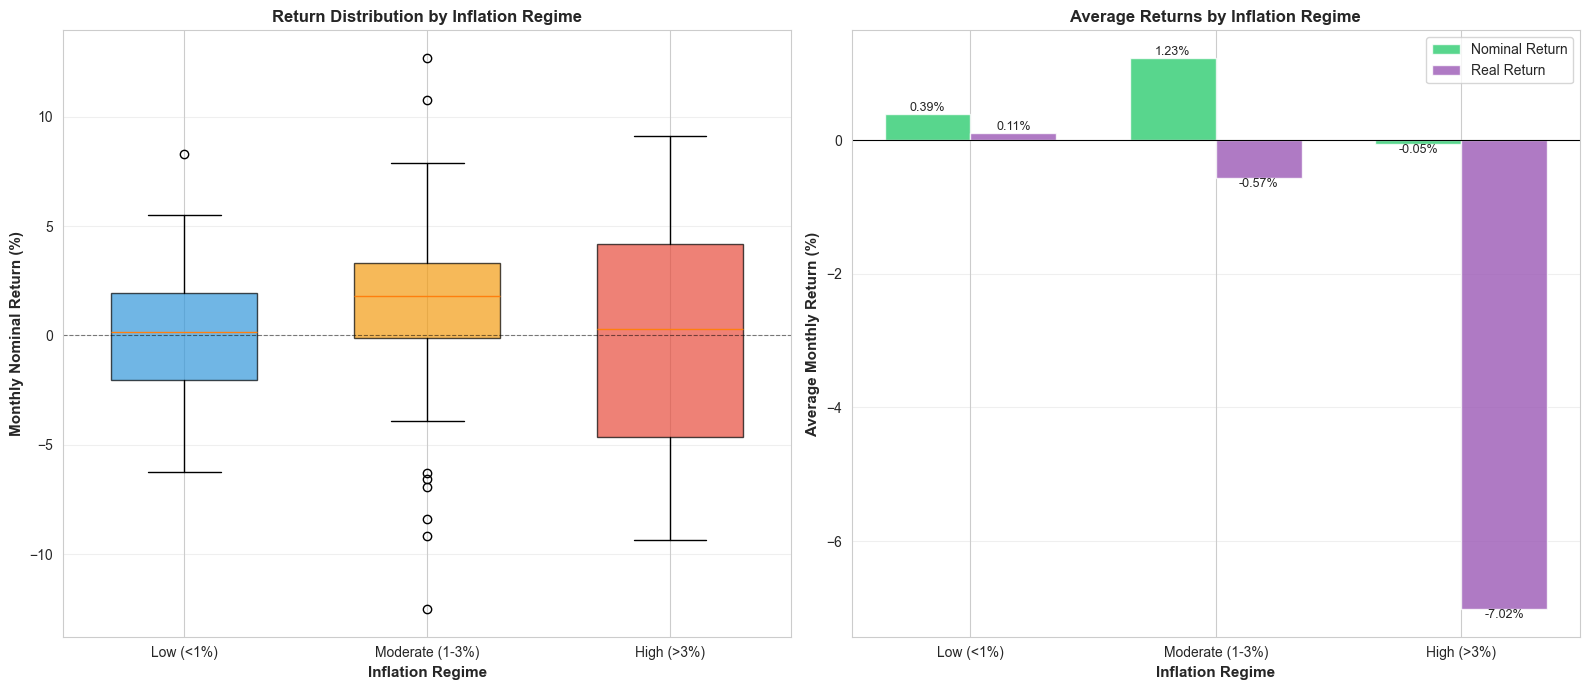


Step 9: Generating Summary Report...
  ✓ Summary report saved to C:\Users\rfull\Building Data Together Weeklies\Finance February\Inflation vs Market Returns Analysis\reports\project_summary.md

KEY FINDINGS

1. OVERALL PERFORMANCE
   • Nominal annualized return: 11.34%
   • Real annualized return: -17.30%
   • Average annual inflation: 2.47%
   • Inflation impact: 28.64%

2. CORRELATION INSIGHTS
   • Average 5-year correlation: -0.042
   • Correlation range: -0.290 to 0.173

3. INFLATION REGIME PERFORMANCE
   Low (<1%):
     - Observations: 18 months
     - Avg nominal return: 0.39%
     - Avg real return: 0.11%
   Moderate (1-3%):
     - Observations: 90 months
     - Avg nominal return: 1.23%
     - Avg real return: -0.57%
   High (>3%):
     - Observations: 22 months
     - Avg nominal return: -0.05%
     - Avg real return: -7.02%

✓ ANALYSIS COMPLETE

Results saved to:
  • Processed data: C:\Users\rfull\Building Data Together Weeklies\Finance February\Inflation vs Market Returns A

In [11]:
# -----------------------------
# Initiate the Actual Analysis
# -----------------------------

def main():
    """Run the complete analysis pipeline."""
    
    print("=" * 80)
    print("INFLATION VS MARKET RETURNS ANALYSIS")
    print("=" * 80)
    print()
    
    # Setup paths
    project_root = Path.cwd()

    while project_root.name != "Inflation vs Market Returns Analysis":
        project_root = project_root.parent

    data_dir = project_root / "data" / "raw"
    output_dir = project_root / "data" / "processed"
    fig_dir = project_root / "figures"

    
    # Create output directories
    output_dir.mkdir(exist_ok=True, parents=True)
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    # Step 1: Load Data
    print("Step 1: Loading Data...")
    loader = DataLoader(data_dir=str(data_dir))
    cpi_df, daily_prices_df, monthly_prices_df = loader.load_all_data()
    print(f"  ✓ Loaded CPI data: {len(cpi_df)} observations")
    print(f"  ✓ Loaded S&P 500 data: {len(monthly_prices_df)} monthly observations")
    print()
    
    # Step 2: Calculate Returns
    print("Step 2: Calculating Returns...")
    calc = FinancialCalculator()
    monthly_returns = calc.calculate_returns(monthly_prices_df)
    print(f"  ✓ Calculated monthly returns: {len(monthly_returns)} observations")
    print()
    
    # Step 3: Align Data
    print("Step 3: Aligning Data...")
    combined_df = calc.align_data(cpi_df, monthly_returns)
    combined_df = calc.calculate_real_returns(combined_df)
    combined_df = calc.calculate_cumulative_returns(combined_df)
    combined_df = calc.add_inflation_regimes(combined_df)
    print(f"  ✓ Aligned dataset: {len(combined_df)} observations")
    print(f"  ✓ Date range: {combined_df.index.min()} to {combined_df.index.max()}")
    print()
    
    # Step 4: Calculate Correlations
    print("Step 4: Calculating Correlations...")
    rolling_corr_60m = calc.calculate_rolling_correlation(
        combined_df, 'Inflation_Rate', 'Nominal_Return', window=60
    )
    rolling_corr_36m = calc.calculate_rolling_correlation(
        combined_df, 'Inflation_Rate', 'Nominal_Return', window=36
    )
    print(f"  ✓ 5-year rolling correlation: mean={rolling_corr_60m.mean():.3f}")
    print(f"  ✓ 3-year rolling correlation: mean={rolling_corr_36m.mean():.3f}")
    print()
    
    # Step 5: Regime Analysis
    print("Step 5: Analyzing Inflation Regimes...")
    regime_stats = calc.analyze_by_regime(combined_df)
    regime_counts = combined_df['Inflation_Regime'].value_counts()
    print(f"  ✓ Regime distribution:")
    for regime, count in regime_counts.items():
        print(f"    - {regime}: {count} months")
    print()
    
    # Step 6: Calculate Metrics
    print("Step 6: Calculating Performance Metrics...")
    nominal_metrics = calc.calculate_annualized_metrics(combined_df['Nominal_Return'])
    real_metrics = calc.calculate_annualized_metrics(combined_df['Real_Return'])
    avg_inflation = combined_df['Inflation_Rate'].mean()
    print(f"  ✓ Annualized nominal return: {nominal_metrics['Annualized_Return']:.2%}")
    print(f"  ✓ Annualized real return: {real_metrics['Annualized_Return']:.2%}")
    print(f"  ✓ Average inflation: {avg_inflation:.2%}")
    print()
    
    # Step 7: Save Processed Data
    print("Step 7: Saving Processed Data...")
    cpi_df.to_csv(output_dir / 'inflation_rates.csv')
    monthly_returns.to_frame('Monthly_Return').to_csv(output_dir / 'market_returns.csv')
    combined_df.to_csv(output_dir / 'combined_analysis.csv')
    print(f"  ✓ Saved processed data to {output_dir}")
    print()
    
    # Step 8: Generate Visualizations
    print("Step 8: Generating Visualizations...")
    viz = FinancialVisualizer()
    
    print("  Creating Figure 1: Inflation vs Nominal Returns...")
    viz.plot_inflation_vs_nominal_returns(
        combined_df,
        save_path=str(fig_dir / 'inflation_vs_nominal_returns.png')
    )
    
    print("  Creating Figure 2: Real vs Nominal Returns...")
    viz.plot_real_vs_nominal_returns(
        combined_df,
        save_path=str(fig_dir / 'real_vs_nominal_returns.png')
    )
    
    print("  Creating Figure 3: Rolling Correlation...")
    viz.plot_rolling_correlation(
        combined_df,
        rolling_corr_60m,
        window=60,
        save_path=str(fig_dir / 'rolling_correlation.png')
    )
    
    print("  Creating Figure 4: Inflation Regimes...")
    viz.plot_inflation_regimes(
        combined_df,
        regime_stats,
        save_path=str(fig_dir / 'inflation_regimes.png')
    )
    print()
    
    # Step 9: Generate Summary Report
    print("Step 9: Generating Summary Report...")
    generate_summary_report(
        combined_df, regime_stats, nominal_metrics, real_metrics,
        avg_inflation, rolling_corr_60m, project_root / 'reports'
    )
    print()
    
    # Print Key Findings
    print("=" * 80)
    print("KEY FINDINGS")
    print("=" * 80)
    print()
    print("1. OVERALL PERFORMANCE")
    print(f"   • Nominal annualized return: {nominal_metrics['Annualized_Return']:.2%}")
    print(f"   • Real annualized return: {real_metrics['Annualized_Return']:.2%}")
    print(f"   • Average annual inflation: {avg_inflation:.2%}")
    print(f"   • Inflation impact: {(nominal_metrics['Annualized_Return'] - real_metrics['Annualized_Return']):.2%}")
    print()
    
    print("2. CORRELATION INSIGHTS")
    print(f"   • Average 5-year correlation: {rolling_corr_60m.mean():.3f}")
    print(f"   • Correlation range: {rolling_corr_60m.min():.3f} to {rolling_corr_60m.max():.3f}")
    print()
    
    print("3. INFLATION REGIME PERFORMANCE")
    for regime in ['Low (<1%)', 'Moderate (1-3%)', 'High (>3%)']:
        if regime in regime_stats.index:
            nom_ret = regime_stats.loc[regime, ('Nominal_Return', 'mean')]
            real_ret = regime_stats.loc[regime, ('Real_Return', 'mean')]
            count = regime_stats.loc[regime, ('Nominal_Return', 'count')]
            print(f"   {regime}:")
            print(f"     - Observations: {count:.0f} months")
            print(f"     - Avg nominal return: {nom_ret:.2%}")
            print(f"     - Avg real return: {real_ret:.2%}")
    print()
    
    print("=" * 80)
    print("✓ ANALYSIS COMPLETE")
    print("=" * 80)
    print()
    print(f"Results saved to:")
    print(f"  • Processed data: {output_dir}")
    print(f"  • Figures: {fig_dir}")
    print(f"  • Summary report: {project_root / 'reports'}")
    print()


def generate_summary_report(combined_df, regime_stats, nominal_metrics, 
                           real_metrics, avg_inflation, rolling_corr, reports_dir):
    """Generate a markdown summary report."""
    
    reports_dir = Path(reports_dir)
    reports_dir.mkdir(exist_ok=True, parents=True)
    
    report_path = reports_dir / 'project_summary.md'
    
    with open(report_path, 'w') as f:
        f.write("# Inflation vs Market Returns: Executive Summary\n\n")
        f.write(f"**Analysis Period:** {combined_df.index.min().strftime('%B %Y')} - ")
        f.write(f"{combined_df.index.max().strftime('%B %Y')}\n\n")
        f.write("---\n\n")
        
        f.write("## Core Questions & Answers\n\n")
        
        f.write("### 1. Do equities hedge inflation?\n\n")
        if real_metrics['Annualized_Return'] > 0:
            f.write(f"**YES** - S&P 500 delivered {real_metrics['Annualized_Return']:.2%} ")
            f.write("real annualized returns, successfully outpacing inflation over this period.\n\n")
        else:
            f.write("**MIXED** - Real returns were negative during this period.\n\n")
        
        f.write("### 2. How does inflation affect real vs nominal returns?\n\n")
        inflation_drag = nominal_metrics['Annualized_Return'] - real_metrics['Annualized_Return']
        f.write(f"Inflation reduced purchasing power by **{inflation_drag:.2%}** annually. ")
        f.write(f"While nominal returns were {nominal_metrics['Annualized_Return']:.2%}, ")
        f.write(f"real returns were only {real_metrics['Annualized_Return']:.2%}.\n\n")
        
        f.write("### 3. Are there inflation regimes where markets struggle?\n\n")
        f.write("Performance varies significantly across inflation environments:\n\n")
        
        for regime in ['Low (<1%)', 'Moderate (1-3%)', 'High (>3%)']:
            if regime in regime_stats.index:
                nom_ret = regime_stats.loc[regime, ('Nominal_Return', 'mean')]
                real_ret = regime_stats.loc[regime, ('Real_Return', 'mean')]
                f.write(f"- **{regime}**: {nom_ret:.2%} nominal, {real_ret:.2%} real\n")
        
        f.write("\n---\n\n")
        f.write("## Key Metrics\n\n")
        f.write("| Metric | Nominal | Real |\n")
        f.write("|--------|---------|------|\n")
        f.write(f"| Annualized Return | {nominal_metrics['Annualized_Return']:.2%} | ")
        f.write(f"{real_metrics['Annualized_Return']:.2%} |\n")
        f.write(f"| Annualized Volatility | {nominal_metrics['Annualized_Volatility']:.2%} | ")
        f.write(f"{real_metrics['Annualized_Volatility']:.2%} |\n")
        f.write(f"| Sharpe Ratio | {nominal_metrics['Sharpe_Ratio']:.2f} | ")
        f.write(f"{real_metrics['Sharpe_Ratio']:.2f} |\n\n")
        
        f.write("---\n\n")
        f.write("## Inflation-Return Relationship\n\n")
        f.write(f"- **Average correlation (5-year rolling):** {rolling_corr.mean():.3f}\n")
        f.write(f"- **Correlation range:** {rolling_corr.min():.3f} to {rolling_corr.max():.3f}\n")
        f.write(f"- **Average inflation rate:** {avg_inflation:.2%}\n\n")
        
        f.write("The correlation is relatively weak and time-varying, suggesting that ")
        f.write("the inflation-return relationship is complex and conditional on other factors.\n\n")
        
        f.write("---\n\n")
        f.write("## Critical Insight\n\n")
        f.write("**Returns without context are meaningless.** This analysis demonstrates that:\n\n")
        f.write("1. Nominal returns can be deceptive - always evaluate real, inflation-adjusted returns\n")
        f.write("2. Economic regimes matter - performance varies across different inflation environments\n")
        f.write("3. Long-term perspective is essential - short-term correlations are unstable\n")
        f.write("4. Context drives decisions - understanding the macro environment is fundamental\n\n")
        
        f.write("This foundational analysis sets the stage for deeper risk assessment and ")
        f.write("portfolio construction in subsequent weeks.\n\n")
        
        f.write("---\n\n")
        f.write("*Generated by automated analysis pipeline*\n")
    
    print(f"  ✓ Summary report saved to {report_path}")


if __name__ == "__main__":
    main()